The wave equation
$$
\frac{\partial^{2} u}{\partial t^{2}}=c^{2} \frac{\partial^{2} u}{\partial x^{2}}
$$
with the boundary conditions $u(0, t)=f(t)$ and $u(L, t)=g(t)$ and initial conditions $u(x, 0)=q(x)$ and $\frac{\partial u}{\partial t}(x, 0)=s(x) .$

If $u^i _j = u(j\Delta x, i\Delta t)$ then

$\frac{\partial^{2} u}{\partial t^{2}}=\frac{u_{j}^{i+1}-2 u_{j}^{i}+u_{j}^{i-1}}{\Delta t^{2}}$
and the discrete (centered) second space derivative is
$\frac{\partial^{2} u}{\partial x^{2}}=\frac{u_{j+1}^{i}-2 u_{j}^{i}+u_{j-1}^{i}}{\Delta x^{2}}$

Substituting in the equation we get the explicit sheme

$$
u_{j}^{i+1}=r^{2} u_{j+1}^{i}+2\left(1-r^{2}\right) u_{j}^{i}+r^{2} u_{j-1}^{i}-u_{j}^{i-1}, \quad r=\frac{c \Delta t}{\Delta x}
$$

or in matrix form

$$
\left(\begin{array}{c}
u_{1}^{i+1} \\
u_{2}^{i+1} \\
\vdots \\
u_{N-1}^{i+1} \\
u_{N}^{i+1}
\end{array}\right)=\left(\begin{array}{ccccc}
2\left(1-r^{2}\right) & r^{2} & & & \\
r^{2} & 2\left(1-r^{2}\right) & r^{2} & & \\
& \ddots & \ddots & \ddots & \\
& & r^{2} & 2\left(1-r^{2}\right) & r^{2} \\
& & & r^{2} & 2\left(1-r^{2}\right)
\end{array}\right)\left(\begin{array}{c}
u_{1}^{i} \\
u_{2}^{i} \\
\vdots \\
u_{N-1}^{i} \\
u_{N}^{i}
\end{array}\right)-\left(\begin{array}{c}
u_{1}^{i-1} \\
u_{2}^{i-1} \\
\vdots \\
u_{N-1}^{i-1} \\
u_{N}^{i-1}
\end{array}\right) .
$$

with boundary conditions $$ u_{1}^{i}=f(i \Delta t) \text { and } u_{N}^{i}=g(i \Delta t) $$


In [1]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
x = np.linspace(0,1,100)
dt = 0.5
tMax = 200
c = 0.015 #Wave speed
t = np.arange(0,tMax,dt)

def fLeft(t):
    return 0*t
def fRight(t):
    return 0*t
def fPosInitial(x):
    return np.exp(-200*(x-0.5)**2)
def fVelInitial(x):
    return 0*x


dx = x[1]-x[0]
r = c*dt/dx
print(r,"<?", 1)
n = len(x)
#Create diagonal matrix
aMat = spdiags([(r**2) * np.ones(n),2*(1-r**2)*np.ones(n),(r**2)*np.ones(n)],[-1,0,1],n,n)

#Impose inital conditions
u = np.zeros((len(t),n))
u[0,:] = fPosInitial(x)
u[:,0] = fLeft(t)
u[:,-1] = fRight(t)

for i in range(0,len(t)-1):
    
    if i == 0:
        u[1,:] = (1/2) * np.dot(aMat.toarray(), u[0,:]) + dt*fVelInitial(x)
    else:
        u[i+1,:] = np.dot(aMat.toarray(), u[i,:]) - u[i-1,:]
    #BC
    u[i+1,0] = fLeft(t[i])
    u[i+1,-1] = fRight(t[i])
    

0.7424999999999999 <? 1


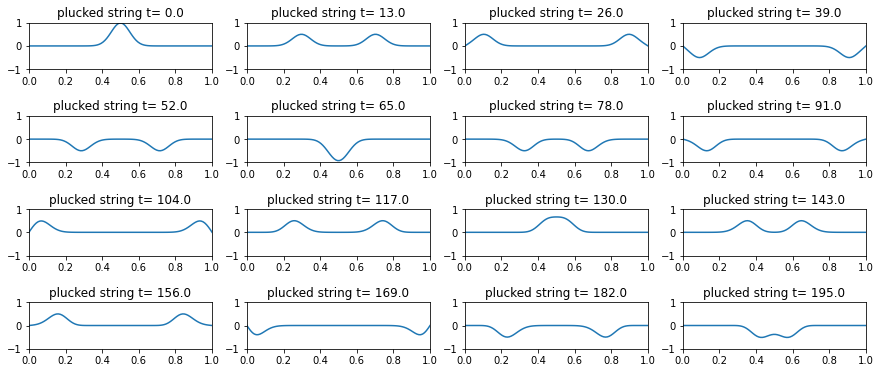

In [3]:
fig, axs = plt.subplots(4,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.19)

axs = axs.ravel()

for inum, i in enumerate(np.arange(0,len(t), int(len(t)/16) + 1)):

    axs[inum].plot(x,u[i+1,:]) 
    axs[inum].set_title(f"plucked string t= {t[i]}")
    axs[inum].set_xlim(0,1)
    axs[inum].set_ylim(-1,1)


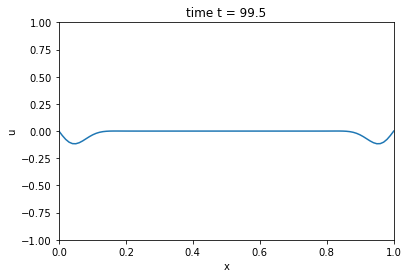

In [9]:
def plot_string(u,k):
    
    plt.clf()   
    
    plt.title('time t = ' + str(round(t[k],3)))
    plt.xlabel("x")
    plt.ylabel("u")
    plt.plot(x,u) 
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    
    return plt
    
def animate(k):
    plot_string(u[k],k)

#They have to be in the same cell
anmt = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=int(u.shape[0]/2),repeat=False)
anmt.save("data/wave.gif")

In [10]:
from IPython.display import HTML
HTML('<img src="data/wave.gif">')